# KMeans Model - Heart h dataset

19:57:30 - src.utils.logger - INFO - 
Loading data

19:57:30 - src.utils.logger - INFO - Data loaded: heart-h
INFO:src.utils.logger:Data loaded: heart-h
19:57:30 - src.utils.logger - INFO - Running KMeans on heart-h dataset
INFO:src.utils.logger:Running KMeans on heart-h dataset
19:57:30 - src.utils.logger - INFO - 
Tuning hyperparameters

INFO:src.utils.logger:
Tuning hyperparameters

19:57:31 - src.utils.logger - INFO - 
Training model

INFO:src.utils.logger:
Training model

19:57:31 - src.utils.logger - INFO - Trained with: {'k': 9}
INFO:src.utils.logger:Trained with: {'k': 9}
19:57:31 - src.utils.logger - INFO - 
Evaluating the model

INFO:src.utils.logger:
Evaluating the model

19:57:31 - src.utils.logger - INFO - Scores: {'k': 9, 'n_out_clusters': 9, 'n_in_classes': 2, 'adjusted_rand_score': 0.051745527908109136, 'v_measure_score': 0.09595495419774344, 'homogeneity_score': 0.20434757659505196, 'completeness_score': 0.06269792759541304, 'silhouette_score': 0.3657790613859949, 'cal

[{'k': 2}, {'k': 3}, {'k': 4}, {'k': 5}, {'k': 6}, {'k': 7}, {'k': 8}, {'k': 9}]
{'k': 2}
{'k': 3}
{'k': 4}
{'k': 5}
{'k': 6}
{'k': 7}
{'k': 8}
{'k': 9}
['adjusted_rand_score', 'v_measure_score', 'silhouette_score', 'calinski_harabasz_score']


19:57:31 - src.utils.logger - INFO - Results written in report/heart-h/KMeans/k_9/23-10-2023_19h-57m-31s
INFO:src.utils.logger:Results written in report/heart-h/KMeans/k_9/23-10-2023_19h-57m-31s
19:57:31 - src.utils.logger - INFO - 
Done!

INFO:src.utils.logger:
Done!



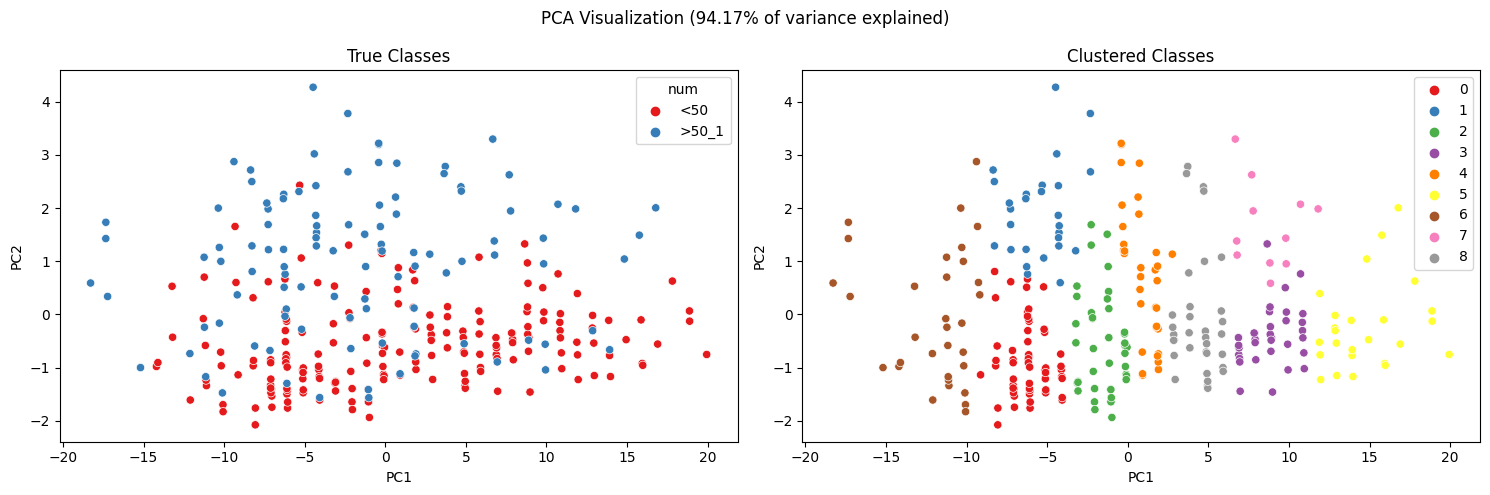

In [1]:
import pandas as pd
from src.trainflow.TrainFlow import TrainFlow
from src.clustering.KMeans import KMeans

ds_name = "heart-h"
model = KMeans
target = "num"
ls_metrics = ['adjusted_rand_score', 'v_measure_score', 
                'silhouette_score', 'calinski_harabasz_score']
output_path = 'report'
d_labels = {
            0: '<50',
            1: '>50_1',
            }

tf = TrainFlow(ds_name, model, target=target, metrics=ls_metrics, 
               d_plot_params=d_labels, output_path=output_path)
tf.run()

In [2]:
tf.df_results

,k,n_out_clusters,n_in_classes,adjusted_rand_score,v_measure_score,homogeneity_score,completeness_score,silhouette_score,calinski_harabasz_score
7,9,9,2,0.051746,0.095955,0.204348,0.062698,0.365779,335.175368
6,8,8,2,0.049794,0.089378,0.182540,0.059176,0.349553,339.077670
5,7,7,2,0.039683,0.067114,0.131819,0.045017,0.339535,380.278857
1,3,3,2,0.006113,0.014485,0.019369,0.011568,0.411488,501.588453
4,6,6,2,0.003577,0.016793,0.030781,0.011546,0.370923,424.848051
0,2,2,2,0.000410,0.016678,0.016914,0.016450,0.517141,514.287420
3,5,5,2,-0.002064,0.017029,0.028644,0.012116,0.302727,404.032681
2,4,4,2,-0.002892,0.012452,0.019194,0.009215,0.345597,458.712643


In [3]:
import matplotlib.pyplot as plt

19:58:51 - src.utils.logger - INFO - 
Loading data

19:58:51 - src.utils.logger - INFO - 
Loading data

19:58:51 - src.utils.logger - INFO - 
Loading data

INFO:src.utils.logger:
Loading data

19:58:51 - src.utils.logger - INFO - Data loaded: heart-h
19:58:51 - src.utils.logger - INFO - Data loaded: heart-h
19:58:51 - src.utils.logger - INFO - Data loaded: heart-h
INFO:src.utils.logger:Data loaded: heart-h
19:58:51 - src.utils.logger - INFO - Running KMeans on heart-h dataset
19:58:51 - src.utils.logger - INFO - Running KMeans on heart-h dataset
19:58:51 - src.utils.logger - INFO - Running KMeans on heart-h dataset
INFO:src.utils.logger:Running KMeans on heart-h dataset
19:58:51 - src.utils.logger - INFO - 
Training model

19:58:51 - src.utils.logger - INFO - 
Training model

19:58:51 - src.utils.logger - INFO - 
Training model

INFO:src.utils.logger:
Training model

19:58:51 - src.utils.logger - INFO - Trained with: {'k': 7}
19:58:51 - src.utils.logger - INFO - Trained with: {'k': 7}


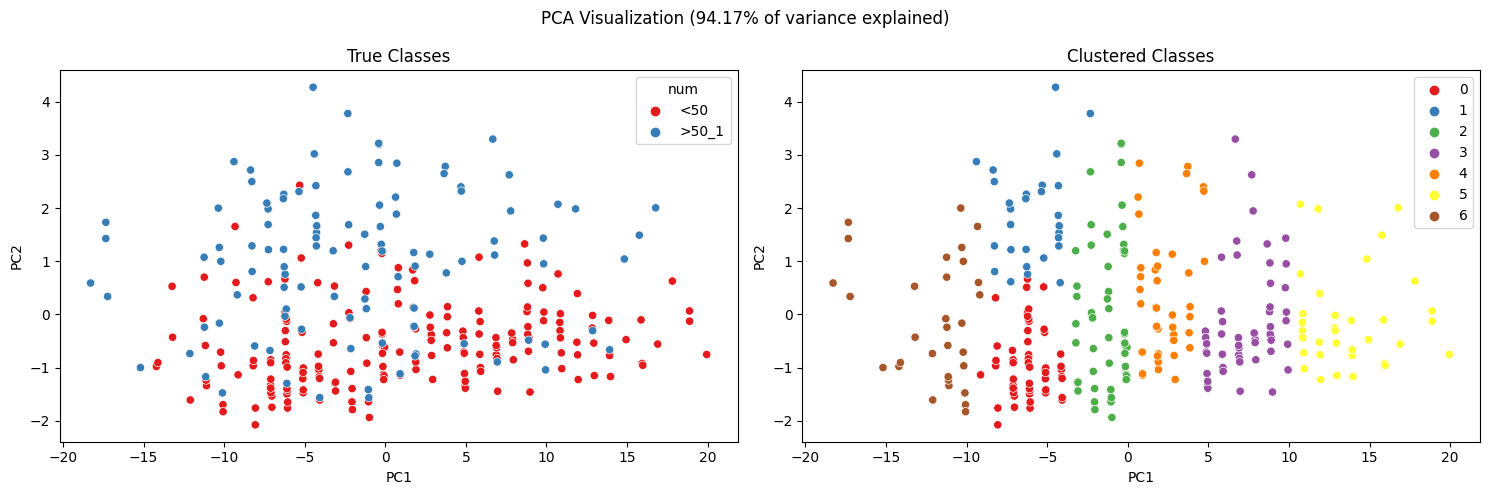

In [6]:
d_hyper = {'k': 7}

new_model = KMeans

tf_bp = TrainFlow(ds_name, new_model, hyperparams=d_hyper, target=target, metrics=ls_metrics, 
               d_plot_params=d_labels, output_path=output_path)
tf_bp.run()

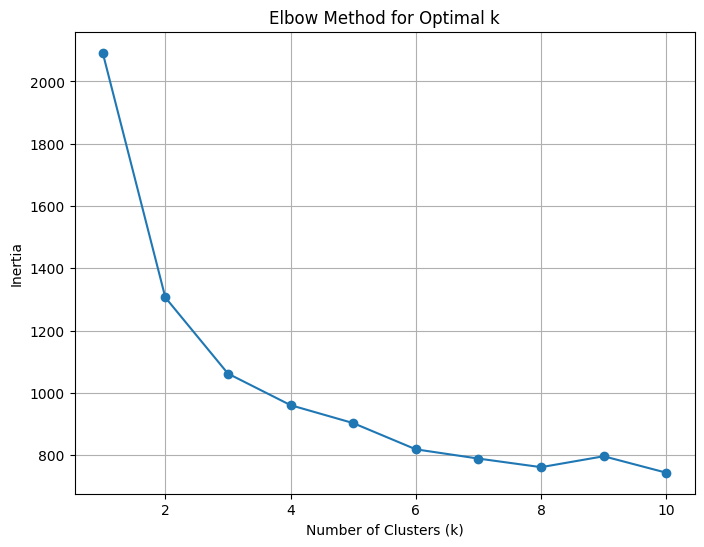

In [5]:
# Elbow method to find the optimal number of clusters (k)
inertia = tf.trained_model.inertia_

# Values of k to try
k_values = range(1, 11)

# List to store the inertias
inertias = []

from src.read.processing import Processing
dataclass = Processing(source_path='input/datasets/')
df = dataclass.read('heart-h')
dataclass.general_preprocessing()
df = dataclass.df
df = df.iloc[:, :-1]

# Run k-means for different values of k
for k in k_values:
    model = KMeans(k=k, random_state=0)
    model.fit(df)  # Where X is your dataset
    inertias.append(model.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.savefig(f'{tf.output_path_total}/img/hearth_elbow_method.png')

plt.show()